In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [8]:
!pip install pmdarima

In [8]:
air=pd.read_excel("Airlines+Data (1).xlsx",index_col="Month",parse_dates=True)
air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit=auto_arima(air["Passengers"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=871.345, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=867.283, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=863.757, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=870.076, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=862.193, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=861.773, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=860.702, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=862.251, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=855.919, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=860.821, Time=0.08 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -421.170
Date:                Mon, 18 Oct 2021   AIC                            854.341
Time:                        13:11:24   BIC                            869.664
Sample:                             0   HQIC                           860.533
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1526      0.142      1.071      0.284      -0.127       0.432
ar.L2          0.4062      0.144      2.815      0.005       0.123       0.689
ar.L3         -0.3167      0.121     -2.619      0.009      -0.554      -0.080
ma.L1          0.1470      0.121      1.215      0.224      -0.090       0.384
ma.L2         -0.7809      0.116     -6.734      0.000      -1.008      -0.554
sigma2       409.9286     75.390      5.437      0.000     262.167     557.690
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.41   Prob(JB):                         0.14
Heteroskedasticity (H):               3.63   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
print(air.shape)
train=air.iloc[:-30]
test=air.iloc[-30:]
print(train.shape,test.shape)

(96, 1)
(66, 1) (30, 1)


In [19]:
model=ARIMA(train["Passengers"],order=(4,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   65
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -272.305
Method:                       css-mle   S.D. of innovations             15.378
Date:                Mon, 18 Oct 2021   AIC                            560.611
Time:                        13:13:03   BIC                            578.006
Sample:                    02-01-1995   HQIC                           567.474
                         - 06-01-2000                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3204      1.709      1.357      0.175      -1.030       5.671
ar.L1.D.Passengers     0.7696      0.152      5.068      0.000       0.472       1.067
ar.L2.D.Passengers    -0.9736      0.157     -6.209      0.000      -1.281      -0.666
ar.L3.D.Passengers     0.0194      0.164      0.118      0.906      -0.301       0.340
ar.L4.D.Passengers    -0.1749      0.150     -1.167      0.243      -0.469       0.119
ma.L1.D.Passengers    -0.7893      0.101     -7.789      0.000      -0.988      -0.591
ma.L2.D.Passengers     1.0000      0.062     16.207      0.000       0.879       1.121
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4962           -0.9038j            1.0310           -0.1701
AR.2            0.4962           +0.9038j            1.0310            0.1701
AR.3           -0.4408           -2.2772j            2.3195           -0.2804
AR.4           -0.4408           +2.2772j            2.3195            0.2804
MA.1            0.3947           -0.9188j            1.0000           -0.1854
MA.2            0.3947           +0.9188j            1.0000            0.1854
-----------------------------------------------------------------------------
"""

In [20]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ="levels")
print(pred)

2000-07-01    270.024552
2000-08-01    272.549177
2000-09-01    271.137891
2000-10-01    265.619142
2000-11-01    264.895715
2000-12-01    272.397769
2001-01-01    282.170311
2001-02-01    286.492908
2001-03-01    283.731248
2001-04-01    279.429146
2001-05-01    280.336276
2001-06-01    287.568184
2001-07-01    295.804956
2001-08-01    299.027430
2001-09-01    296.623981
2001-10-01    293.686169
2001-11-01    295.541777
2001-12-01    302.374671
2002-01-01    309.344678
2002-02-01    311.760503
2002-03-01    309.796001
2002-04-01    308.026623
2002-05-01    310.560014
2002-06-01    316.926493
2002-07-01    322.823504
2002-08-01    324.676442
2002-09-01    323.195862
2002-10-01    322.407741
2002-11-01    325.401907
2002-12-01    331.275441
Freq: MS, dtype: float64


<AxesSubplot:xlabel='Month'>

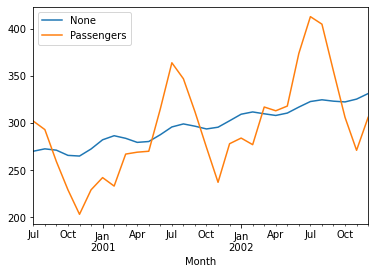

In [21]:
pred.plot(legend=True)
test["Passengers"].plot(legend=True)

In [16]:
test.mean()

Passengers    295.4
dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

47.95357769123716


In [18]:
model2=ARIMA(air["Passengers"],order=(3,1,2))
model2=model2.fit()
air.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [36]:
index_future_dates=pd.date_range(start='2002-12-01',end='2002-12-31')
print(index_future_dates)
pred=model2.predict(start=len(air),end=len(air)+30,typ='levels').rename("ARIMA Predictions")
#print(comp_pred)
pred.index=index_future_dates
print(pred)

DatetimeIndex(['2002-12-01', '2002-12-02', '2002-12-03', '2002-12-04',
               '2002-12-05', '2002-12-06', '2002-12-07', '2002-12-08',
               '2002-12-09', '2002-12-10', '2002-12-11', '2002-12-12',
               '2002-12-13', '2002-12-14', '2002-12-15', '2002-12-16',
               '2002-12-17', '2002-12-18', '2002-12-19', '2002-12-20',
               '2002-12-21', '2002-12-22', '2002-12-23', '2002-12-24',
               '2002-12-25', '2002-12-26', '2002-12-27', '2002-12-28',
               '2002-12-29', '2002-12-30', '2002-12-31'],
              dtype='datetime64[ns]', freq='D')
2002-12-01    336.124586
2002-12-02    341.796031
2002-12-03    344.706746
2002-12-04    338.918221
2002-12-05    338.960907
2002-12-06    337.430897
2002-12-07    340.997160
2002-12-08    342.786756
2002-12-09    346.879840
2002-12-10    348.888613
2002-12-11    352.086852
2002-12-12    353.849212
2002-12-13    356.566944
2002-12-14    358.455984
2002-12-15    361.085777
2002-12-16    363.1769

<AxesSubplot:>

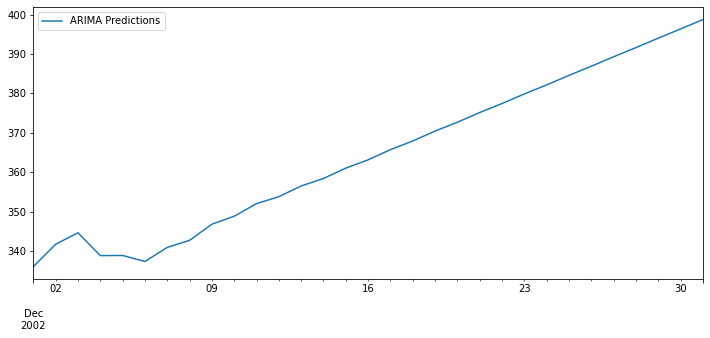

In [38]:
pred.plot(figsize=(12,5),legend=True)